# Whatsapp Chat Analysis

## Introduction

Import Libraries

- emojis - to handle emojis with ease
- wordcloud - to display the most frequent words 

In [1]:
!pip install jovian --upgrade --quiet
!pip install numpy --upgrade --quiet
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet
!pip install wordcloud --upgrade --quiet
!pip install emoji  --upgrade --quiet
!pip install plotly_express --upgrade --quiet

In [2]:
!pip install plotly

In [15]:
#import plotly.express as px
import os
import pandas as pd
import re
import datetime as time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import emoji
import re
from collections import Counter

## Data Processing and Cleaning

In [18]:
whatsapp_df = pd.read_fwf('chat.txt', header=None)

In [19]:
whatsapp_df.head()

,0,1,2,3,4,5
0,"17/05/2020,",4:29,pm,-,Jaz: Baby sandal ka size correct hai na 🤪,NaN
1,"17/05/2020,",4:29,pm,-,Shivani Amborkar: Ji ha😂,NaN
2,"17/05/2020,",4:30,pm,-,Jaz: Hehe okay then,NaN
3,"17/05/2020,",4:30,pm,-,Jaz: 😄,NaN
4,"17/05/2020,",4:30,pm,-,Shivani Amborkar: 💋,NaN


In [20]:
whatsapp_df.shape

(41508, 6)

In [21]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41508 entries, 0 to 41507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       41261 non-null  object
 1   1       40996 non-null  object
 2   2       40886 non-null  object
 3   3       20449 non-null  object
 4   4       40734 non-null  object
 5   5       1270 non-null   object
dtypes: object(6)
memory usage: 1.9+ MB


In [22]:
def txtTodf(txt_file):
    '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
    # some regex to account for messages taking up multiple lines
    pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(txt_file) as file:
        data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]

    user     = []; 
    message  = []; 
    datetime = []
    
    for row in data:
        # timestamp is before the first dash
        datetime.append(row.split(' - ')[0])
        # sender is between am/pm, dash and colon
        try:
            s = re.search('m - (.*?):', row).group(1)
            user.append(s)
        except:
            user.append('')

        # message content is after the first colon
        try:
            message.append(row.split(': ', 1)[1])
        except:
            message.append('')

    df = pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
    df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%Y, %I:%M %p')

    # remove events not associated with a sender
    df = df[df.user != ''].reset_index(drop=True)
    
    return df

whatsapp_df = txtTodf('Chat.txt')

In [24]:
whatsapp_df.head()

,datetime,user,message
0,2020-05-17 16:29:00,Jaz,Baby sandal ka size correct hai na 🤪
1,2020-05-17 16:29:00,Shivani Amborkar,Ji ha😂
2,2020-05-17 16:30:00,Jaz,Hehe okay then
3,2020-05-17 16:30:00,Jaz,😄
4,2020-05-17 16:30:00,Shivani Amborkar,💋


In [33]:
whatsapp_df['user'].replace(to_replace='Jaz', value='Ashiish', inplace=True)

In [34]:
whatsapp_df.head()

,datetime,user,message
0,2020-05-17 16:29:00,Ashiish,Baby sandal ka size correct hai na 🤪
1,2020-05-17 16:29:00,Shivani Amborkar,Ji ha😂
2,2020-05-17 16:30:00,Ashiish,Hehe okay then
3,2020-05-17 16:30:00,Ashiish,😄
4,2020-05-17 16:30:00,Shivani Amborkar,💋


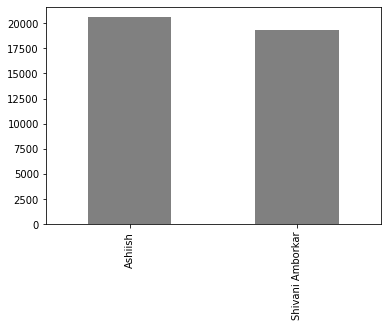

In [38]:
whatsapp_df.user.value_counts().plot(kind='bar', color='gray')
plt.show()

In [40]:
whatsapp_df.datetime.describe()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   39990
unique                   8284
top       2021-01-15 16:39:00
freq                       45
first     2020-05-17 16:29:00
last      2021-02-22 19:14:00
Name: datetime, dtype: object

## Cleaning Image Data

In [41]:
img = whatsapp_df[whatsapp_df['message'] == "<Media omitted>" ]

In [42]:
img.shape

(1238, 3)

In [43]:
whatsapp_df.drop(img.index, inplace=True)

In [44]:
whatsapp_df.head(10)

,datetime,user,message
0,2020-05-17 16:29:00,Ashiish,Baby sandal ka size correct hai na 🤪
1,2020-05-17 16:29:00,Shivani Amborkar,Ji ha😂
2,2020-05-17 16:30:00,Ashiish,Hehe okay then
3,2020-05-17 16:30:00,Ashiish,😄
4,2020-05-17 16:30:00,Shivani Amborkar,💋
5,2020-05-17 16:30:00,Shivani Amborkar,Hehe
6,2020-05-17 16:30:00,Ashiish,Hehe 😘
7,2020-05-17 16:30:00,Shivani Amborkar,😌
8,2020-05-17 16:30:00,Ashiish,Mera name dikh rha hai
9,2020-05-17 16:30:00,Shivani Amborkar,Yessss


In [45]:
whatsapp_df.reset_index(inplace=True, drop=True)
whatsapp_df.shape

(38752, 3)

## EDA

### Which user has most messages in chat?

In [46]:
totalNumberofMessage = whatsapp_df.message.count()
username   = whatsapp_df["user"].unique()

print('The total of the number of message:', totalNumberofMessage)
print('User name that involve in the chat:', username)

The total of the number of message: 38752
User name that involve in the chat: ['Ashiish' 'Shivani Amborkar']


In [47]:
#Creating a new dataframe by copying the old dataframe
whatsapp_df1 = whatsapp_df.copy()
whatsapp_df1['Number_of_messages'] = [1]* whatsapp_df1.shape[0]
whatsapp_df1.drop(columns = 'datetime', inplace = True)

#We are groupby the user and messages together then we will use count() to count the messages for each of user
whatsapp_df1 = whatsapp_df1.groupby('user')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
whatsapp_df1

,user,Number_of_messages
0,Ashiish,20071
1,Shivani Amborkar,18681


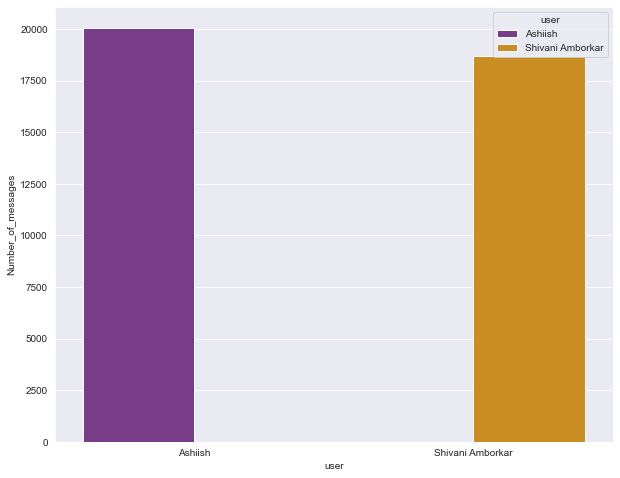

In [53]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (10, 8)
sns.barplot(x=whatsapp_df1.user, y=whatsapp_df1.Number_of_messages, hue=whatsapp_df1.user, palette="CMRmap")
plt.show()